### Exercise 2: Iris Flower Clustering Using K-Means, Agglomerative, and HDBSCAN

##### Import the libraries necessary for this project.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import HDBSCAN
import warnings

warnings.filterwarnings("ignore")

#### 1. Load the Dataset

##### Load Iris dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

##### Print the first 5 rows of the dataset to get the overview of dataframe.

In [3]:
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### 2. Preprocessing

##### Using StandardScaler normalize the dataset.

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#### 3. Apply Clustering Algorithms

##### Using the Elbow Method find the optimal number of clusters and compare the results.

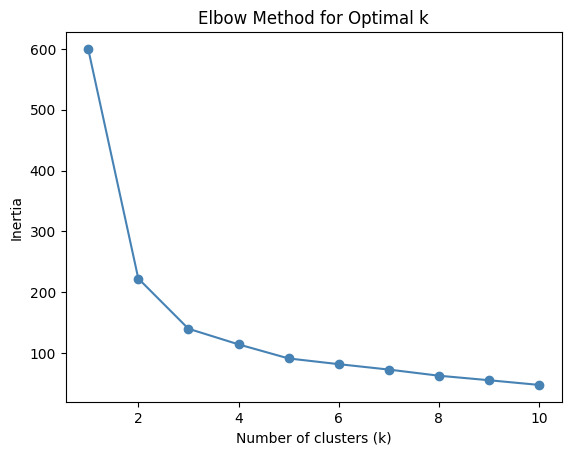

In [16]:
inertia_values = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-4,
        random_state=42
    )
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    
plt.plot(k_values , inertia_values , marker='o', color="steelblue")
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

##### Using Silhouette score find the optimal number of clusters for KMeans.

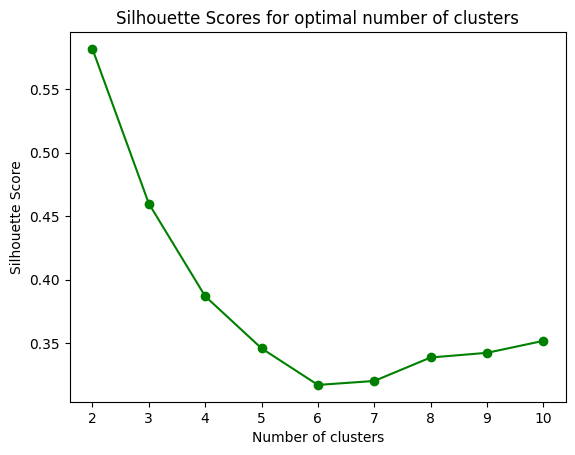

In [6]:
silhouette_scores = []
values = range(2, 11)
for i in values:
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-4,
        random_state=42
    )
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

plt.plot(values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Using the K-Means clustering algorithm perform data clustering.

In [7]:
optimal_k = 2
kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)
kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
df['kmeans_cluster'] = y_kmeans

##### Using Silhouette score find the optimal number of clusters for Agglomerative algorithm.

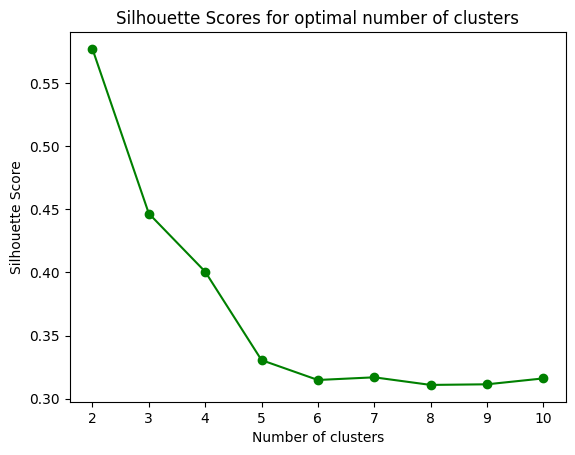

In [8]:
silhouette_scores = []
values = range(2, 11)
for i in values:
    agg_clustering = AgglomerativeClustering(
        n_clusters=i, 
        metric='euclidean',
        linkage='ward',
        distance_threshold=None
    )
    cluster_labels = agg_clustering.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

plt.plot(values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#####  The following code snippet was adapted from the Scikit-learn documentation to generate and plot the dendrogram.

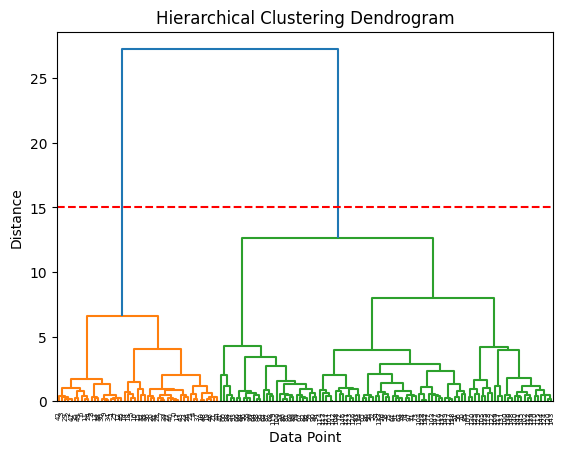

In [9]:
dendrogram(linkage(df_scaled, 'ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.show()

##### Using Agglomerative Clustering with ward method and 2 clusters.

In [10]:
agg_clustering = AgglomerativeClustering(
    n_clusters=2, 
    metric='euclidean',
    linkage='ward',
    distance_threshold=None
)
labels = agg_clustering.fit_predict(df_scaled)
df['agg_cluster'] = labels

##### With the HDBSCAN library identify the optimal clusters based on density.

In [11]:
hdbscan_clustering = HDBSCAN(
    min_cluster_size=5, 
    min_samples=2, 
    cluster_selection_epsilon=0.01
)
hdb_labels = hdbscan_clustering.fit_predict(df_scaled)
df['hdbscan_cluster'] = hdb_labels

#### 4. Visualize the Clusters

##### With 2D scatter plot of K-Means visualize clusters with diferent colors and add cluster centroids.

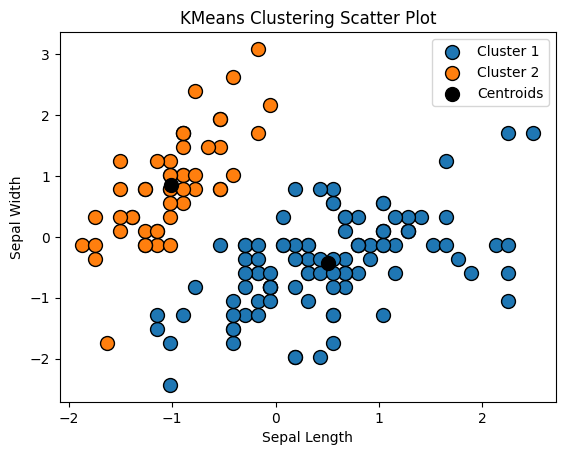

In [12]:
for k in range(optimal_k):
    plt.scatter(df_scaled[y_kmeans == k, 0], df_scaled[y_kmeans == k, 1], edgecolors='k', s=100, label="Cluster " + str(k + 1))
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', edgecolors='k', s=100, label='Centroids')
plt.title("KMeans Clustering Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

##### With 2D scatter plot visualize clusters of Agglomerative Clustering.

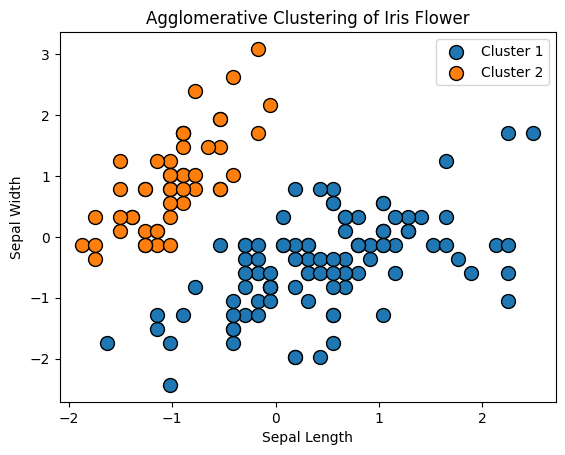

In [13]:
for k in range(2):
    plt.scatter(df_scaled[labels == k, 0], df_scaled[labels == k, 1], edgecolors='k', s=100, label="Cluster " + str(k + 1))
plt.title("Agglomerative Clustering of Iris Flower")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

##### Plot the HDBSCAN clustering results with noise and varying densities.

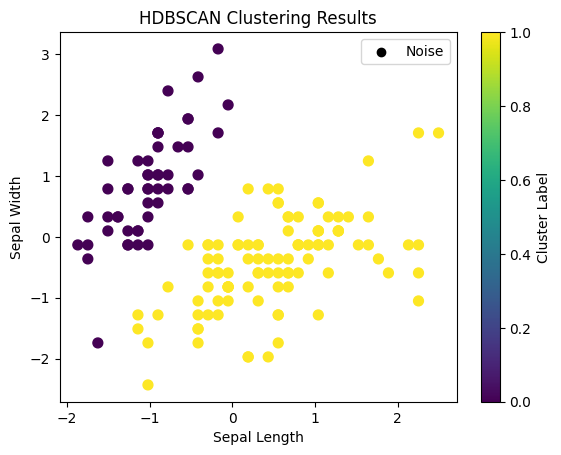

In [14]:
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=hdb_labels, cmap='viridis', s=50)
plt.scatter(df_scaled[hdb_labels == -1,0], df_scaled[hdb_labels == -1, 1], c='black', label='Noise')
plt.title("HDBSCAN Clustering Results")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.show()

#### 5. Insights

##### We can see that the K-Means struggles with complex shapes and varying densities as it works better with spherical clusters in low to medium dimensions. Agglomerative Clustering is more robust than K-Means because K-Means can be affected when there are outliers. On the other side, HDBSCAN handles clusters with arbitrary shapes and noise.

##### K-Means is best suited for applications where the number of clusters is known and the clusters are spherical and have the same variance (e.g., customer segmentation, document clustering, segment an image). Agglomerative Clustering is ideal for use cases where the number of clusters is unknown and for smaller datasets with varying cluster shapes (e.g., pattern recognition, social network analysis, geographic clustering). HDBSCAN is particularly effective at identifying sparse clusters and noise (e.g., anomaly detection, geospatial clustering).